# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

In [2]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [3]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []


In [31]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
city_country = zip(cities,countries)
# Print the city count to confirm sufficient count
len(cities)

1337

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
# Import API key
from api_keys import weather_api_key
#print(weather_api_key)
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#weather_response = requests.get(query_url)
#weather_json = weather_response.json()

In [33]:
#start counter for cities
number = 1
#Create list for requirements 
city_id = []
city_name = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind = []

# Create loop through cities and get data
print('Start of list')
# API call to weather map
for city in cities:
    try:
        city_info = (requests.get(url + '&q=' + city)).json()
        city_name.append(city_info['name'])
        lat.append(city_info['coord']['lat'])
        lng.append(city_info['coord']['lon'])
        temp.append(city_info['main']['temp'])
        humidity.append(city_info['main']['humidity'])
        cloudiness.append(city_info['clouds']['all'])
        wind.append(city_info['wind']['speed'])
        print(f'City number {number} of {len(cities)}complete. | Added {city}')
        number = number + 1
    except KeyError:
        print(f'Missing data in city number {number} of {len(cities)}. | Skipping {city}')
        number = number + 1
print('End of list')
        
        

Start of list
Missing data in city number 1 of 1337. | Skipping belushya guba
City number 2 of 1337complete. | Added rikitea
City number 3 of 1337complete. | Added albany
City number 4 of 1337complete. | Added frontera
City number 5 of 1337complete. | Added oparino
City number 6 of 1337complete. | Added luanda
City number 7 of 1337complete. | Added mataura
City number 8 of 1337complete. | Added cape town
City number 9 of 1337complete. | Added jamestown
City number 10 of 1337complete. | Added grand gaube
City number 11 of 1337complete. | Added valley city
City number 12 of 1337complete. | Added bredasdorp
City number 13 of 1337complete. | Added shingu
City number 14 of 1337complete. | Added hobart
City number 15 of 1337complete. | Added dubasari
City number 16 of 1337complete. | Added leningradskiy
City number 17 of 1337complete. | Added busselton
City number 18 of 1337complete. | Added nara
City number 19 of 1337complete. | Added zapolyarnyy
City number 20 of 1337complete. | Added kait

City number 165 of 1337complete. | Added okhotsk
City number 166 of 1337complete. | Added souillac
City number 167 of 1337complete. | Added yellowknife
City number 168 of 1337complete. | Added inhambane
City number 169 of 1337complete. | Added lazaro cardenas
City number 170 of 1337complete. | Added goderich
City number 171 of 1337complete. | Added kidal
City number 172 of 1337complete. | Added hohhot
City number 173 of 1337complete. | Added san matias
City number 174 of 1337complete. | Added cabo san lucas
City number 175 of 1337complete. | Added french harbor
City number 176 of 1337complete. | Added hualmay
City number 177 of 1337complete. | Added cidreira
City number 178 of 1337complete. | Added geraldton
City number 179 of 1337complete. | Added san andres
City number 180 of 1337complete. | Added viedma
City number 181 of 1337complete. | Added porto novo
City number 182 of 1337complete. | Added lakselv
City number 183 of 1337complete. | Added northam
City number 184 of 1337complete.

City number 327 of 1337complete. | Added lerwick
City number 328 of 1337complete. | Added burnie
City number 329 of 1337complete. | Added malanje
City number 330 of 1337complete. | Added coolum beach
City number 331 of 1337complete. | Added tucuman
City number 332 of 1337complete. | Added kirsanov
City number 333 of 1337complete. | Added bethel
City number 334 of 1337complete. | Added lyubytino
City number 335 of 1337complete. | Added pa sang
City number 336 of 1337complete. | Added chulman
Missing data in city number 337 of 1337. | Skipping louisbourg
City number 338 of 1337complete. | Added lorengau
City number 339 of 1337complete. | Added erdaojiang
City number 340 of 1337complete. | Added sioux lookout
City number 341 of 1337complete. | Added oslo
City number 342 of 1337complete. | Added zabid
City number 343 of 1337complete. | Added sehithwa
Missing data in city number 344 of 1337. | Skipping umzimvubu
City number 345 of 1337complete. | Added krasnovishersk
City number 346 of 1337

City number 489 of 1337complete. | Added izumo
City number 490 of 1337complete. | Added nemuro
City number 491 of 1337complete. | Added batouri
City number 492 of 1337complete. | Added camacha
City number 493 of 1337complete. | Added santa fe
City number 494 of 1337complete. | Added sao paulo de olivenca
City number 495 of 1337complete. | Added samdari
City number 496 of 1337complete. | Added erzin
City number 497 of 1337complete. | Added great yarmouth
City number 498 of 1337complete. | Added constitucion
City number 499 of 1337complete. | Added limenaria
City number 500 of 1337complete. | Added stornoway
City number 501 of 1337complete. | Added juazeiro
City number 502 of 1337complete. | Added costinesti
City number 503 of 1337complete. | Added kloulklubed
City number 504 of 1337complete. | Added ixtlan del rio
City number 505 of 1337complete. | Added lompoc
City number 506 of 1337complete. | Added illela
City number 507 of 1337complete. | Added dingle
City number 508 of 1337complete

City number 653 of 1337complete. | Added coruripe
City number 654 of 1337complete. | Added sovetskiy
Missing data in city number 655 of 1337. | Skipping aporawan
City number 656 of 1337complete. | Added capanema
City number 657 of 1337complete. | Added huarmey
City number 658 of 1337complete. | Added laukaa
City number 659 of 1337complete. | Added oistins
Missing data in city number 660 of 1337. | Skipping kazalinsk
City number 661 of 1337complete. | Added beira
City number 662 of 1337complete. | Added whitianga
City number 663 of 1337complete. | Added ilhabela
City number 664 of 1337complete. | Added shuyskoye
City number 665 of 1337complete. | Added farah
City number 666 of 1337complete. | Added parintins
City number 667 of 1337complete. | Added severodvinsk
City number 668 of 1337complete. | Added ukiah
City number 669 of 1337complete. | Added vikhorevka
City number 670 of 1337complete. | Added ranong
City number 671 of 1337complete. | Added angoche
Missing data in city number 672 o

City number 814 of 1337complete. | Added dongzhen
City number 815 of 1337complete. | Added cockburn town
City number 816 of 1337complete. | Added rio grande
City number 817 of 1337complete. | Added dunedin
City number 818 of 1337complete. | Added ola
City number 819 of 1337complete. | Added hobyo
City number 820 of 1337complete. | Added fukuma
City number 821 of 1337complete. | Added kemijarvi
City number 822 of 1337complete. | Added genc
City number 823 of 1337complete. | Added thinadhoo
City number 824 of 1337complete. | Added flinders
City number 825 of 1337complete. | Added porto san giorgio
City number 826 of 1337complete. | Added abalak
City number 827 of 1337complete. | Added gravdal
City number 828 of 1337complete. | Added yenotayevka
City number 829 of 1337complete. | Added caravelas
City number 830 of 1337complete. | Added dhidhdhoo
City number 831 of 1337complete. | Added vardo
Missing data in city number 832 of 1337. | Skipping dibaya
City number 833 of 1337complete. | Adde

City number 976 of 1337complete. | Added abu dhabi
City number 977 of 1337complete. | Added marienburg
City number 978 of 1337complete. | Added zhangjiakou
City number 979 of 1337complete. | Added te kauwhata
Missing data in city number 980 of 1337. | Skipping tapaua
City number 981 of 1337complete. | Added high level
City number 982 of 1337complete. | Added santa isabel
City number 983 of 1337complete. | Added buckeye
City number 984 of 1337complete. | Added ocos
City number 985 of 1337complete. | Added rafsanjan
City number 986 of 1337complete. | Added port-de-bouc
City number 987 of 1337complete. | Added biloela
Missing data in city number 988 of 1337. | Skipping almenevo
City number 989 of 1337complete. | Added pekalongan
City number 990 of 1337complete. | Added saint-francois
City number 991 of 1337complete. | Added mikuni
City number 992 of 1337complete. | Added ziro
City number 993 of 1337complete. | Added huayucachi
City number 994 of 1337complete. | Added loandjili
City number

City number 1135 of 1337complete. | Added scarborough
City number 1136 of 1337complete. | Added ceres
City number 1137 of 1337complete. | Added toora-khem
City number 1138 of 1337complete. | Added ozinki
City number 1139 of 1337complete. | Added alexandria
City number 1140 of 1337complete. | Added dongtai
City number 1141 of 1337complete. | Added tobol
City number 1142 of 1337complete. | Added porto de moz
City number 1143 of 1337complete. | Added eidfjord
City number 1144 of 1337complete. | Added aripuana
City number 1145 of 1337complete. | Added sagua de tanamo
Missing data in city number 1146 of 1337. | Skipping puerto pinasco
City number 1147 of 1337complete. | Added gucheng
City number 1148 of 1337complete. | Added zwedru
Missing data in city number 1149 of 1337. | Skipping karamea
City number 1150 of 1337complete. | Added sandwick
City number 1151 of 1337complete. | Added santiago del estero
City number 1152 of 1337complete. | Added san miguel de cauri
City number 1153 of 1337com

City number 1294 of 1337complete. | Added teseney
City number 1295 of 1337complete. | Added la ronge
City number 1296 of 1337complete. | Added phetchaburi
City number 1297 of 1337complete. | Added salamiyah
City number 1298 of 1337complete. | Added porteirinha
City number 1299 of 1337complete. | Added abramovka
Missing data in city number 1300 of 1337. | Skipping senmonorom
City number 1301 of 1337complete. | Added wlodawa
City number 1302 of 1337complete. | Added goure
City number 1303 of 1337complete. | Added yorkton
City number 1304 of 1337complete. | Added elizabeth city
Missing data in city number 1305 of 1337. | Skipping lolua
Missing data in city number 1306 of 1337. | Skipping qabis
City number 1307 of 1337complete. | Added awjilah
City number 1308 of 1337complete. | Added kudat
City number 1309 of 1337complete. | Added brigantine
City number 1310 of 1337complete. | Added hirara
City number 1311 of 1337complete. | Added carroll
City number 1312 of 1337complete. | Added male
Cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
# Create dataframe for requirements 
city_info_df = pd.DataFrame({'City': city_name,
                            'Latitude': lat,
                            'Longitude': lng,
                            'Temperature': temp,
                            'Humidity': humidity,
                            'Cloudiness': cloudiness,
                            'Wind Speed': wind})
# Save dataframe to csv file
pd.DataFrame.to_csv(city_info_df, 'city_info2.csv')
city_info_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Rikitea,-23.12,-134.97,77.45,69,71,7.36
1,Albany,42.60,-73.97,38.05,46,1,1.01
2,Frontera,26.93,-101.45,79.00,60,61,1.99
3,Oparino,59.85,48.28,31.77,90,90,3.91
4,Luanda,-8.84,13.23,77.00,94,75,3.36


In [35]:
city_count = city_info_df.count()
print(city_count)

City           1241
Latitude       1241
Longitude      1241
Temperature    1241
Humidity       1241
Cloudiness     1241
Wind Speed     1241
dtype: int64


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [36]:
# Summary stats
print(city_info_df.describe())

          Latitude    Longitude  Temperature     Humidity   Cloudiness  \
count  1241.000000  1241.000000  1241.000000  1241.000000  1241.000000   
mean     22.193723    22.170685    59.731120    67.717969    50.653505   
std      30.848780    85.506102    20.163654    21.396889    39.057536   
min     -54.800000  -179.170000    -4.000000     7.000000     0.000000   
25%      -2.890000   -54.110000    44.800000    56.000000     9.000000   
50%      26.770000    27.360000    61.840000    72.000000    47.000000   
75%      47.800000    96.110000    76.910000    83.000000    90.000000   
max      78.220000   179.320000    96.800000   100.000000   100.000000   

        Wind Speed  
count  1241.000000  
mean      7.237309  
std       5.018580  
min       0.040000  
25%       3.360000  
50%       6.260000  
75%       9.660000  
max      33.550000  


In [37]:
# Cities with hummidity >100%
humid_cities = city_info_df.loc[city_info_df["Humidity"]>100].count()
print(humid_cities)

City           0
Latitude       0
Longitude      0
Temperature    0
Humidity       0
Cloudiness     0
Wind Speed     0
dtype: int64


In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [14]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

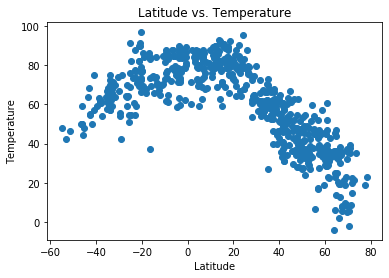

In [15]:
# Scatter Plot of latitude vs. temperature 
plt.scatter(city_info_df['Latitude'], city_info_df['Temperature']);
plt.title(f'Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig("Latitude_vs_Temperature.png")
plt.show()

The scatter plot shows the temperature rising as the latitude gets closer to the equator. 
The scatter plot also shows the temperature drop as it gets further away from the equator.

## Latitude vs. Humidity Plot

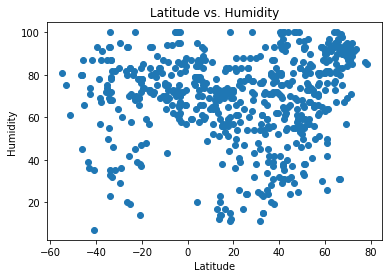

In [17]:
# Scatter Plot of latitude vs. humidity 
plt.scatter(city_info_df['Latitude'], city_info_df['Humidity']);
plt.title(f'Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("Latitude_vs_Humidity.png")
plt.show()

The scatter plot shows that there is no pattern in the data. At a first glance it looks like humidity is greater as the latitude increases but there is no definate correlation. 

## Latitude vs. Cloudiness Plot

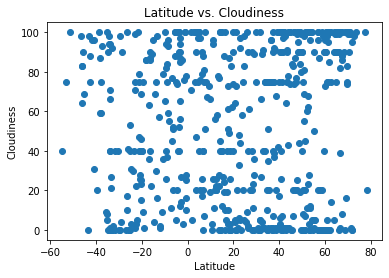

In [18]:
# Scatter Plot of latitude vs. temperature 
plt.scatter(city_info_df['Latitude'], city_info_df['Cloudiness']);
plt.title(f'Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

There is no pattern with this data. I do not believe there is a correlation between cloudiness and latitude. 

## Latitude vs. Wind Speed Plot

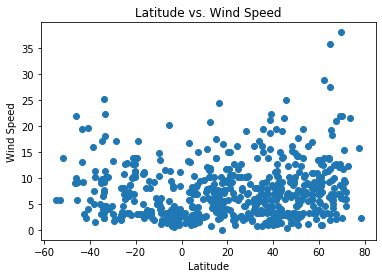

In [19]:
# Scatter Plot of latitude vs. temperature 
plt.scatter(city_info_df['Latitude'], city_info_df['Wind Speed']);
plt.title(f'Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("Latitude_vs_WindSpeed.png")
plt.show()

It looks like the wind speed could be correlated with latitude but there is not a difinitive pattern. 

## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots

In [21]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = city_info_df.loc[city_info_df["Latitude"]>=0]
#northern_hemisphere_df.count
southern_hemisphere_df = city_info_df.loc[city_info_df["Latitude"]<=0]
#southern_hemisphere_df.count

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.98x + 92.04
The r-squared is: 0.7844395094260476


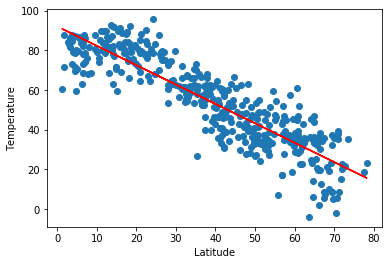

In [22]:
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,xy=(-10,-20), xytext=(10,3),fontsize=15,color="red")
print(line_eq)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is a negative correlation between max temperature and the latitude. the r-squared value is above .65 which is an indicator that there is a strong correlation in the data. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.56x + 82.4
The r-squared is: 0.41841502666827823


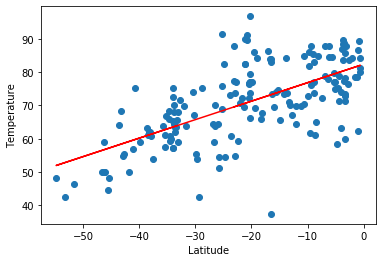

In [23]:
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,xy=(-10,-20), xytext=(10,3),fontsize=15,color="red")
print(line_eq)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is a positive correlation with the data but the r-square value is below .65, indicating there is not a strong correlation. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.27x + 57.45
The r-squared is: 0.060797146272875496


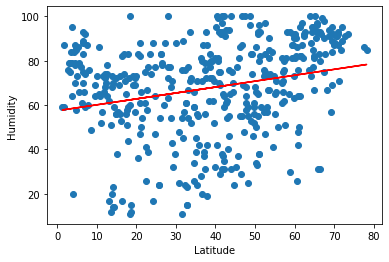

In [24]:
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,xy=(-10,-20), xytext=(10,3),fontsize=15,color="red")
print(line_eq)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is not a correlation between humidity and latitude. The r-square value is very close to 0.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.25x + 75.97
The r-squared is: 0.03718383599288941


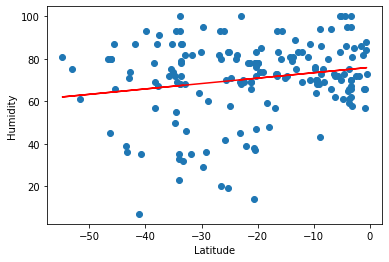

In [25]:
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,xy=(-10,-20), xytext=(10,3),fontsize=15,color="red")
print(line_eq)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is no correlation, the r-square value is close to 0. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.25x + 41.83
The r-squared is: 0.014871421040872386


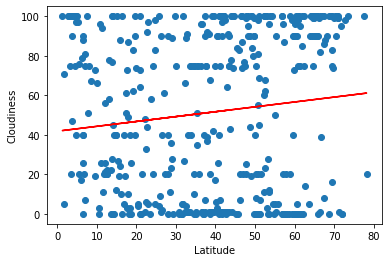

In [26]:
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,xy=(-10,-20), xytext=(10,3),fontsize=15,color="red")
print(line_eq)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is not a correlation between cloudiness and latitude. The r-square value is very close to 0.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.19x + 55.33
The r-squared is: 0.0052313479648587674


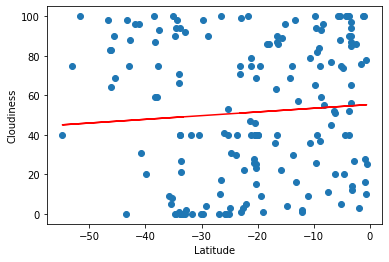

In [27]:
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,xy=(-10,-20), xytext=(10,3),fontsize=15,color="red")
print(line_eq)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is not a correlation between cloudiness and latitude. The r-square value is very close to 0.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.05x + 5.85
The r-squared is: 0.03549909380869348


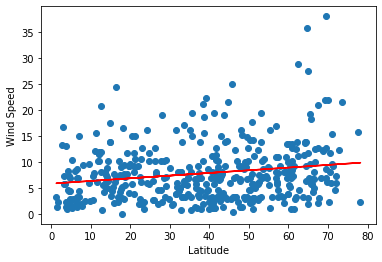

In [28]:
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,xy=(-10,-20), xytext=(10,3),fontsize=15,color="red")
print(line_eq)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is not a correlation between wind speed and latitude. The r-square value is very close to 0.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.14x + 4.26
The r-squared is: 0.1376746520785255


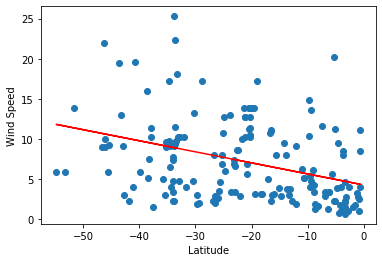

In [29]:
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,xy=(-10,-20), xytext=(10,3),fontsize=15,color="red")
print(line_eq)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is not a correlation between wind speed and latitude. The r-square value is very close to 0.